# Dataset Statistical Analysis  *by Yuting Lu*

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Import data(parquet2csv)

In [3]:
data_2021_01 = pd.read_csv('yellow_tripdata_2021-01.csv') 

In [5]:
data_2021_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021/1/1 0:30,2021/1/1 0:36,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021/1/1 0:51,2021/1/1 0:52,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021/1/1 0:43,2021/1/1 1:11,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021/1/1 0:15,2021/1/1 0:31,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021/1/1 0:31,2021/1/1 0:48,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [7]:
data_2021_01['tpep_pickup_datetime'] = pd.to_datetime(data_2021_01.tpep_pickup_datetime)
data_2021_01['tpep_dropoff_datetime'] = pd.to_datetime(data_2021_01.tpep_dropoff_datetime)

In [8]:
data_2021_01.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1048575 non-null  int64         
 1   tpep_pickup_datetime   1048575 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1048575 non-null  datetime64[ns]
 3   passenger_count        1048575 non-null  int64         
 4   trip_distance          1048575 non-null  float64       
 5   RatecodeID             1048575 non-null  int64         
 6   store_and_fwd_flag     1048575 non-null  object        
 7   PULocationID           1048575 non-null  int64         
 8   DOLocationID           1048575 non-null  int64         
 9   payment_type           1048575 non-null  int64         
 10  fare_amount            1048575 non-null  float64       
 11  extra                  1048575 non-null  float64       
 12  mta_tax                10485

In [9]:
data_2021_01.nunique()  #Count the number of different values for each column in the dataframe

VendorID                     2
tpep_pickup_datetime     35573
tpep_dropoff_datetime    35664
passenger_count              9
trip_distance             3448
RatecodeID                   7
store_and_fwd_flag           2
PULocationID               256
DOLocationID               260
payment_type                 4
fare_amount               1173
extra                       19
mta_tax                      3
tip_amount                1934
tolls_amount               242
improvement_surcharge        3
total_amount              5951
congestion_surcharge         4
airport_fee                  1
dtype: int64

## Demand

### Hourly pick-up demand for taxi in 2021 Jan in whole NYC city - hourly plot

<AxesSubplot:xlabel='tpep_pickup_datetime'>

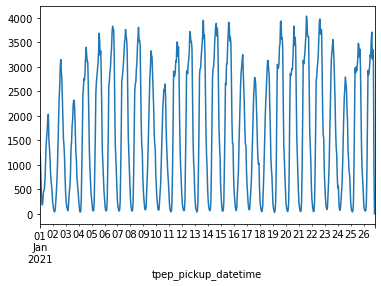

In [11]:
data_2021_01[(data_2021_01['tpep_pickup_datetime'].dt.year > 2020) & (data_2021_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['total_amount'].count().resample('h').sum().plot()

### Hourly and weekday distribution of pick-up demand for taxi in NYC

<AxesSubplot:xlabel='tpep_pickup_datetime'>

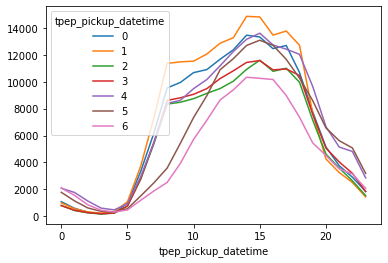

In [12]:
(data_2021_01.groupby([data_2021_01['tpep_pickup_datetime'].dt.hour, data_2021_01['tpep_pickup_datetime'].dt.weekday])['fare_amount'].count()).unstack().plot(kind='line')
# Monday=0, Sunday=6.

In [13]:
pickup_count = np.histogram(data_2021_01['tpep_pickup_datetime'].dt.hour, bins=24, range=(0,24))

<BarContainer object of 24 artists>

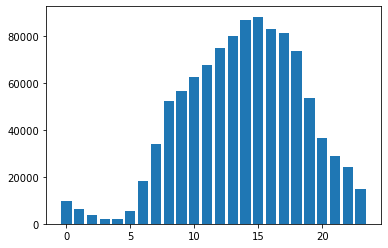

In [14]:
plt.bar(pickup_count[1][:-1], pickup_count[0])  # hourly pickup demand

## Trip distance

### Hourly distribution of mean trip distance in NYC

<AxesSubplot:xlabel='tpep_pickup_datetime'>

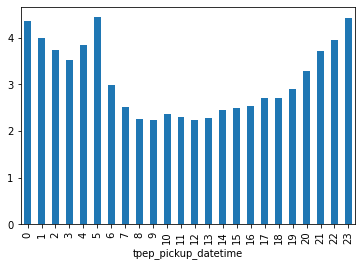

In [15]:
(data_2021_01.groupby(data_2021_01['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean()).plot(kind='bar')

### Average minutely trip distance in 2021 Jan in NYC

<AxesSubplot:xlabel='tpep_pickup_datetime'>

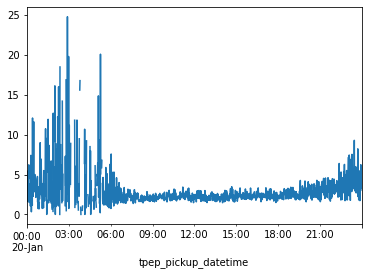

In [18]:
data_2021_01[(data_2021_01['tpep_pickup_datetime'].dt.year > 2020) & (data_2021_01['tpep_pickup_datetime'].dt.month == 1) & (data_2021_01['trip_distance'] < 100) & (data_2021_01['tpep_pickup_datetime'].dt.day == 20)].groupby(['tpep_pickup_datetime'])['trip_distance'].mean().resample('T').mean().plot()

## Fare & tips

### Hourly distribution of mean fare amount in NYC

<AxesSubplot:xlabel='tpep_pickup_datetime'>

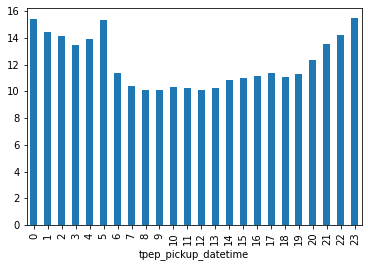

In [19]:
(data_2021_01.groupby(data_2021_01['tpep_pickup_datetime'].dt.hour)['fare_amount'].mean()).plot(kind='bar')

### Weekday distribution of mean fare amout in NYC

<AxesSubplot:xlabel='tpep_pickup_datetime'>

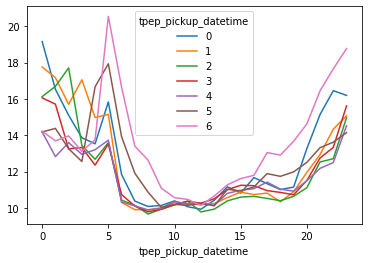

In [20]:
(data_2021_01.groupby([data_2021_01['tpep_pickup_datetime'].dt.hour, data_2021_01['tpep_pickup_datetime'].dt.weekday])['fare_amount'].mean()).unstack().plot(kind='line')
#Monday=0, Sunday=6.

### Total amount of taxi prices in 2021 Jan in NYC - hourly data plot

<AxesSubplot:xlabel='tpep_pickup_datetime'>

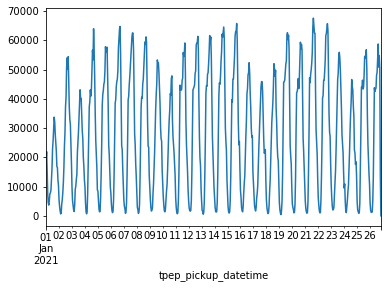

In [21]:
data_2021_01[(data_2021_01['tpep_pickup_datetime'].dt.year > 2020) & (data_2021_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['total_amount'].sum().resample('h').sum().plot()

### Total amount of taxi fare and tips in 2021 Jan in NYC - hourly data plot

<AxesSubplot:xlabel='tpep_pickup_datetime'>

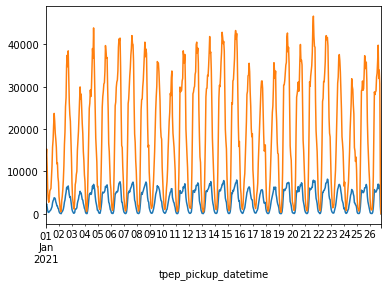

In [22]:
data_2021_01[(data_2021_01['tpep_pickup_datetime'].dt.year > 2020) & (data_2021_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['tip_amount'].sum().resample('h').sum().plot()
data_2021_01[(data_2021_01['tpep_pickup_datetime'].dt.year > 2020) & (data_2021_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['fare_amount'].sum().resample('h').sum().plot()